In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

from sklearn.metrics import confusion_matrix

# Part1: MNIST Handwritten Digits

## SVM

## Scaling MNIST Data


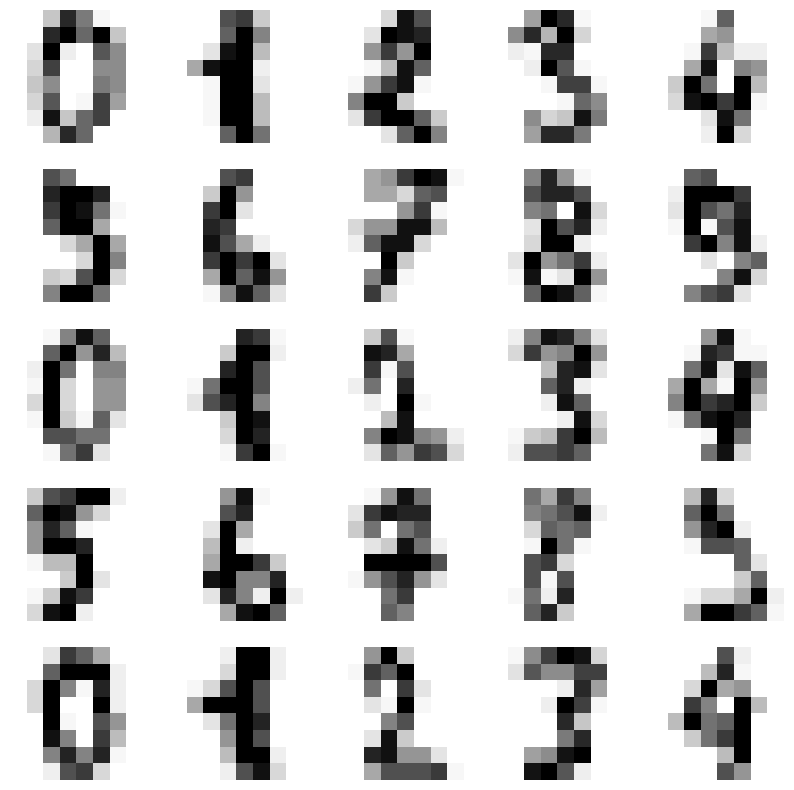

In [7]:
# load the data and scale it
digits = load_digits()
scaled_data = scale( digits.data )

plt.figure( figsize=(10, 10) )
 
for i in np.arange( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.imshow( digits.images[i] , cmap='Greys', interpolation='nearest' )
    plt.axis( 'off' )

plt.show()

## Use SVM with an rbf kernel and parameter C=100 to build a classifier using the training dataset.

## Using the test dataset, evaluate the accuracy of the model. Again using the test dataset, compute the confusion matrix. What is the most common mistake that the classifier makes?

In [12]:
# Split the data into training set and testing set
x = scale( digits.data )
y = digits.target
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state=1, test_size=0.6 )

svc = svm.SVC( kernel='rbf', C=100 )
svc.fit(x_train , y_train )

y_test_pred = svc.predict(x_test)

accuracy = svc.score(x_test, y_test)
print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_test_pred))


Accuracy: 0.9814643188137164
[[ 99   0   0   0   0   0   0   0   0   0]
 [  0 112   0   0   1   0   0   0   0   0]
 [  0   0 102   0   2   0   0   1   0   0]
 [  0   0   1 114   1   0   0   1   0   0]
 [  0   0   0   0 122   0   0   0   0   0]
 [  0   0   0   0   0  96   1   0   0   1]
 [  0   0   0   0   0   0 108   0   1   0]
 [  0   0   0   0   0   0   0 102   0   1]
 [  0   0   0   1   1   0   0   0  95   1]
 [  0   0   0   0   1   2   1   0   2 109]]


The highest non diagnol number is 2, occurring at the following positions:

Actual class 2 predicted as class 4.

Actual class 9 predicted as class 5.

Actual class 9 predicted as class 8.

Indicating number '9' is the most common mistake the classifier has when classification.

## Plot all of these misclassified digits as images.

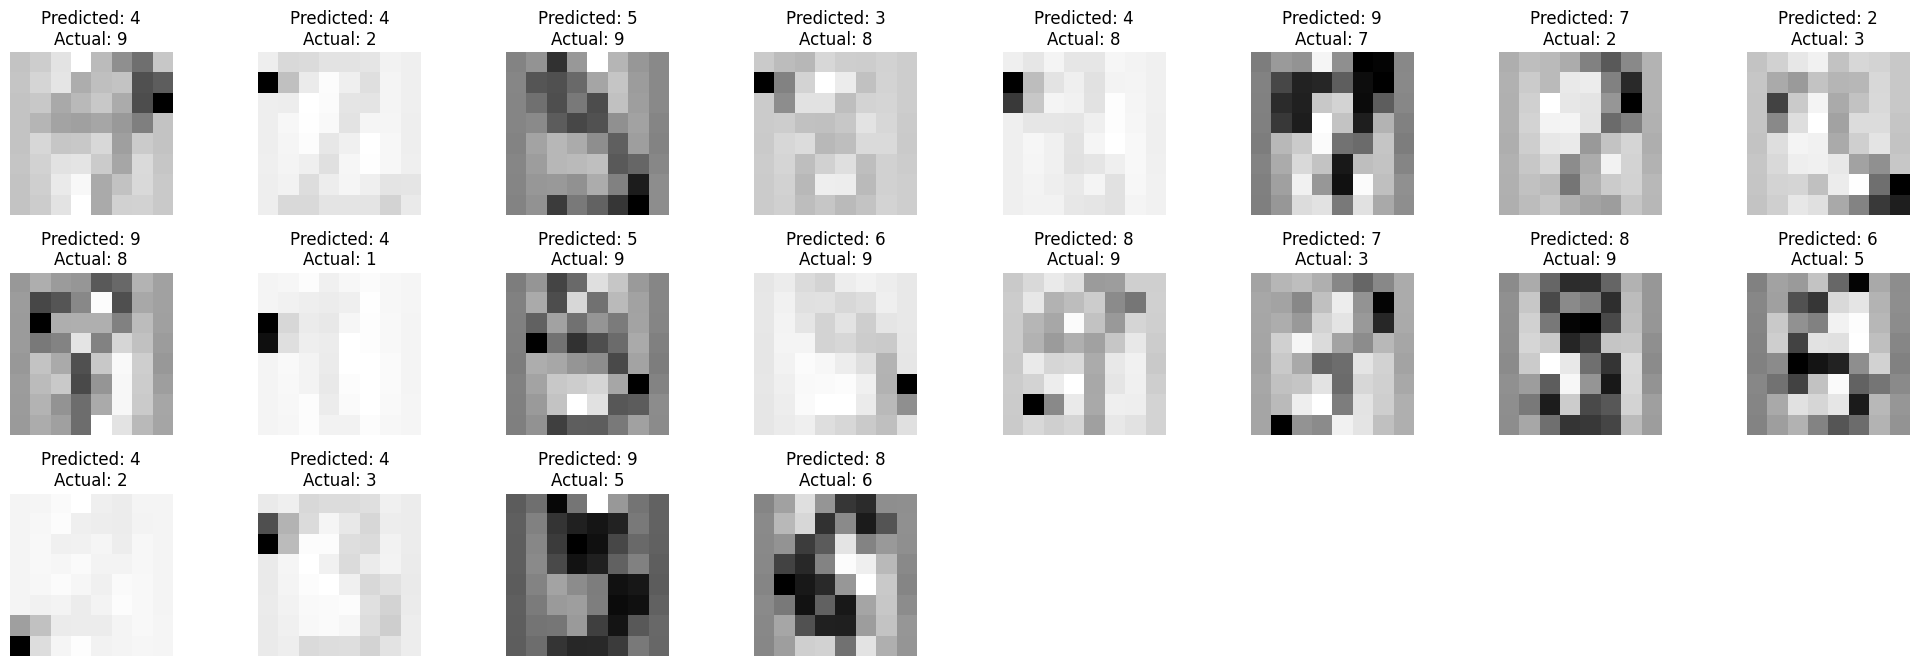

In [18]:
misclassifiedIndices = np.where(y_test != y_test_pred)[0]

plt.figure(figsize=(20, 20))
for i, index in enumerate(misclassifiedIndices):
    plt.subplot(9, 8, i+1)
    plt.axis("off")
    plt.imshow(np.reshape(x_test[index], (8,8)), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {y_test_pred[index]}\nActual: {y_test[index]}")
    
plt.tight_layout()  
plt.show()

## Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value?

In [19]:
max_score = 0
best_c = 1

# test the svm model using different c's
for c in range(1, 502, 5):

	loop = svm.SVC( kernel='rbf', C=c )
	loop.fit( x_train, y_train)

	scores = cross_val_score( estimator=loop, X=x_train, y=y_train, cv=10, scoring='accuracy' ) 
	avg_score = np.mean(scores)

	# update c if necessary
	if avg_score > max_score:
		max_score = avg_score
		best_c = c

print( 'Best c value: ', best_c)

Best c value:  6


## Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [21]:
x_train, x_test, y_train, y_test = train_test_split( digits.data, y, random_state=1, test_size=0.6 )
clf = svm.SVC(kernel='rbf', C=100)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9870250231696015


## KNN